# Análisis de datos - Efecto Hall

## 1.) Campo magnetico en funcion de la corriente

Populating the interactive namespace from numpy and matplotlib
(220.84415588077485, 3.76981033201056)
(191.97402603843665, 2.2969907049599616)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 5: ordinal not in range(128)

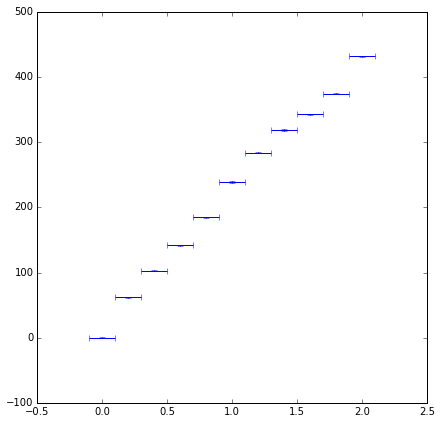

In [3]:
%pylab inline
from scipy.optimize import curve_fit as fit

I = [ 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2 ]
B_exp1 = [ 0.02, 62, 103, 142, 185, 239, 284, 319, 343, 375, 432 ]
B_exp2 = [ 0, 41, 74, 118, 148, 181, 228, 252, 305, 350, 402 ]

def lin0( x, a ):
    return a*x

B1, errB1 = fit( lin0, I, B_exp1, sigma = 1 )
B2, errB2 = fit( lin0, I, B_exp2, sigma = 1 )

B1, B2 = B1[ 0 ], B2[ 0 ]
errB1 = sqrt( diag( errB1 )[0] + 0.1**2 )
errB2 = sqrt( diag( errB2 )[0] + 0.1**2 )

print( B1, errB1 )
print( B2, errB2 )

x = linspace( I[0], I[-1], 1000 )
figure( figsize( 7, 7 ) )
errorbar( I, B_exp1, xerr = 0.1, yerr = 1, fmt = 'none', label = r'Sin módulo' )
errorbar( I, B_exp2, xerr = 0.1, yerr = 1, fmt = 'none', label = r'Con módulo' )
plot( x, lin0( x, B1 ), '--b' )
annotate( r'$B = (220\pm 4 \ \frac{mT}{A}) I$', xy = ( 1.5, lin0(1.5, B1) ), xytext = ( 1, 350 ),
         arrowprops=dict(facecolor='black', shrink=0.01) )
plot( x, lin0( x, B2 ), '--g' )
annotate( r'$B = (192\pm 2 \ \frac{mT}{A}) I$', xy = ( 1.5, lin0(1.5, B2) ), xytext = ( 1.6, 250 ),
         arrowprops=dict(facecolor='black', shrink=0.01) )
xlabel( r'Corriente (A)' )
ylabel( r'Campo magnético (mT)' )
xlim( 0, 2.1 )
ylim( 0, 420 )
legend( loc = 0 )
grid( )
savefig( 'B.pdf' )
show( )

## 2.) Voltaje de Hall en funcion de la corriente, campo magnético constante

(0.70776066350647171, 0.050000009048590657)
(1.2528960449540851, 0.050000740108528147)
(1.9238736103398735, 0.050002178318680403)
(-0.65322421610216441, 0.050000476465676694)
(-1.1477450980422854, 0.050001006668057651)
(-1.6741072316779708, 0.050000139587664173)


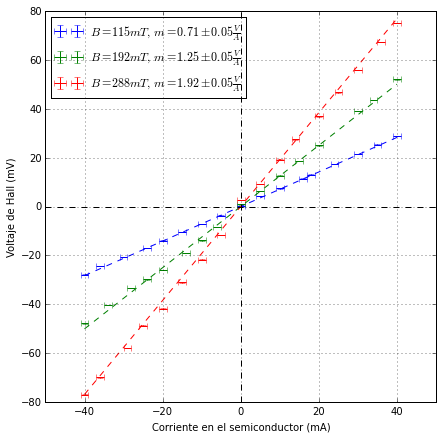

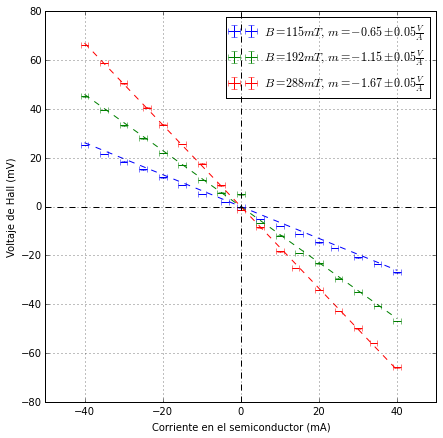

In [4]:
N06AI = [ -40, -36, -30, -24, -20, -15, -10, -5, 0, 5, 10, 16, 18, 24, 30, 35, 40 ]
N06AVhall = [ -27.9, -24.4, -20.7, -16.9, -14, -10.5, -7.2, -3.7, 0.1, 4.3, 7.4, 11.4, 13.1, 17.5, 21.6, 25.3, 28.8 ]
N10AI = [ -40, -34, -28, -24, -20, -14, -10, -6, 0, 5, 10, 15, 20, 30, 34, 40 ]
N10AVhall = [ -47.9, -40.4, -33.3, -29.9, -26.1, -19.0, -13.9, -8.3, 0.9, 6.4, 12.6, 18.7, 25.0, 39.1, 43.6, 52.1 ]
N15AI = [ -40, -36, -29, -25, -20, -15, -10, -5, 0, 5, 10, 14, 20, 25, 30, 36, 40 ]
N15AVhall = [ -77.1, -70.0, -58.0, -48.8, -41.8, -31.1, -21.8, -11.6, 2.7, 9.2, 19.2, 27.5, 36.9, 46.7, 56.0, 67.4, 75.2 ]

P06AI = [ -40, -35, -30, -25, -20, -15, -10, -4, 0, 5, 10, 15, 20, 24, 30, 35, 40 ]
P06AVhall = [ 25.1, 21.5, 18.4, 15.2, 11.9, 8.8, 5.2, 1.9, -0.4, -5.1, -7.9, -11.2, -14.7, -17.1, -20.8, -23.6, -27.0 ]
P10AI = [ -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40 ]
P10AVhall = [ 45.1, 39.5, 33.2, 27.9, 22.0, 16.9, 10.9, 5.7, 5.0, -6.8, -11.9, -19.0, -23.3, -29.5, -35.0, -40.7, -47.0 ]
P15AI = [ -40, -35, -30, -24, -20, -15, -10, -5, 0, 5, 10, 14, 20, 25, 30, 34, 40 ]
P15AVhall = [ 66.2, 58.7, 50.4, 40.5, 33.5, 25.5, 17.6, 8.7, -1.5, -8.6, -18.4, -25.2, -34.1, -42.9, -49.9, -56.0, -65.9 ]

N06, errN06 = fit( lin0, N06AI, N06AVhall, sigma = 0.1 )
N10, errN10 = fit( lin0, N10AI, N10AVhall, sigma = 0.1 )
N15, errN15 = fit( lin0, N15AI, N15AVhall, sigma = 0.1 )
P06, errP06 = fit( lin0, P06AI, P06AVhall, sigma = 0.1 )
P10, errP10 = fit( lin0, P10AI, P10AVhall, sigma = 0.1 )
P15, errP15 = fit( lin0, P15AI, P15AVhall, sigma = 0.1 )
N06, N10, N15, P06, P10, P15 = N06[0], N10[0], N15[0], P06[0], P10[0], P15[0]
errN06 = sqrt( (diag( errN06 )[0]/N06)**2 + 0.05**2 )
errN10 = sqrt( (diag( errN10 )[0]/N06)**2 + 0.05**2 )
errN15 = sqrt( (diag( errN15 )[0]/N06)**2 + 0.05**2 )
errP06 = sqrt( (diag( errP06 )[0]/N06)**2 + 0.05**2 )
errP10 = sqrt( (diag( errP10 )[0]/N06)**2 + 0.05**2 )
errP15 = sqrt( (diag( errP15 )[0]/N06)**2 + 0.05**2 )

print( N06, errN06 )
print( N10, errN10 )
print( N15, errN15 )
print( P06, errP06 )
print( P10, errP10 )
print( P15, errP15 )

x = linspace( -40, 40, 1000 )
figure(  )
errorbar( N06AI, N06AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 115 mT,\ m = 0.71\pm 0.05 \frac{V}{A}$' )
errorbar( N10AI, N10AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 192 mT,\ m = 1.25\pm 0.05 \frac{V}{A}$' )
errorbar( N15AI, N15AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 288 mT,\ m = 1.92\pm 0.05 \frac{V}{A}$' )
plot( x, lin0( x, N06 ), '--b' )
plot( x, lin0( x, N10 ), '--g' )
plot( x, lin0( x, N15 ), '--r' )
xlabel( r'Corriente en el semiconductor (mA)' )
ylabel( r'Voltaje de Hall (mV)' )
legend( loc = 0 )
grid( )
axhline( 0, linestyle = '--', color = 'k' )
axvline( 0, linestyle = '--', color = 'k' )
savefig( 'BConst-NGe.pdf' )
show( )

figure(  )
errorbar( P06AI, P06AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 115 mT,\ m = -0.65\pm 0.05 \frac{V}{A}$' )
errorbar( P10AI, P10AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 192 mT,\ m = -1.15\pm 0.05 \frac{V}{A}$' )
errorbar( P15AI, P15AVhall, xerr = 1, yerr = 0.1, fmt = 'none', label = r'$B = 288 mT,\ m = -1.67\pm 0.05 \frac{V}{A}$' )
plot( x, lin0( x, P06 ), '--b' )
plot( x, lin0( x, P10 ), '--g' )
plot( x, lin0( x, P15 ), '--r' )
xlabel( r'Corriente en el semiconductor (mA)' )
ylabel( r'Voltaje de Hall (mV)' )
legend( loc = 0 )
grid( )
axhline( 0, linestyle = '--', color = 'k' )
axvline( 0, linestyle = '--', color = 'k' )
savefig( 'BConst-PGe.pdf' )
show( )

## 3.) Voltaje de Hall en funcion del campo magnetico, corriente constante

(0.12827086997754633, 0.0006972189825535061)
(0.18062508449787879, 0.00069727271347780014)
(-0.19925585164401091, 0.00069825607033771847)
(-0.11529562978609222, 0.00069816214187976792)
(-0.17388715998873713, 0.0006996139757723946)
(0.1848396697677322, 0.00070135214052170715)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 10: ordinal not in range(128)

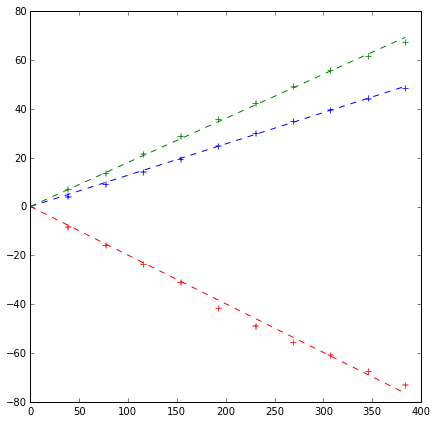

In [5]:
I.pop( 0 )
B = [ B2*i for i in I ]
errB = [ sqrt( (errB2/B2)**2 + (0.1/i)**2 ) for i in I ]

NVhall20 = [ 4.1, 9.2, 14.3, 19.5, 24.9, 30.2, 35.1, 39.7, 44.3, 48.5 ]
NVhall30 = [ 7.2, 13.8, 21.7, 28.8, 35.8, 42.5, 49.2, 55.9, 61.7, 67.4 ]
NVhall30Inv = [ -8.2, -15.8, -23.5, -30.9, -41.6, -48.8, -55.5, -60.7, -67.4, -73.0 ]
PVhall20 = [ -5.8, -10.0, -14.8, -19.5, -23.8, -27.9, -31.7, -35.2, -38.8, -41.7 ]
PVhall30 = [ -8.2, -15.1, -22.3, -29.0, -36.2, -42.7, -47.8, -53.3, -58.1, -62.8 ]
PVhall30Inv = [ 10.5, 17.0, 24.2, 31.0, 38.2, 44.8, 50.7, 56.9, 61.7, 66.6 ]

N20, errN20 = fit( lin0, B, NVhall20, sigma = 0.1 )
N30, errN30 = fit( lin0, B, NVhall30, sigma = 0.1 )
N30Inv, errN30Inv = fit( lin0, B, NVhall30Inv, sigma = 0.1 )
P20, errP20 = fit( lin0, B, PVhall20, sigma = 0.1 )
P30, errP30 = fit( lin0, B, PVhall30, sigma = 0.1 )
P30Inv, errP30Inv = fit( lin0, B, PVhall30Inv, sigma = 0.1 )
N20, N30, N30Inv, P20, P30, P30Inv = N20[0], N30[0], N30Inv[0], P20[0], P30[0], P30Inv[0]
errN20 = sqrt( (diag( errN20 )[0]/N20)**2 + (mean(errB)/mean(B))**2 )
errN30 = sqrt( (diag( errN30 )[0]/N30)**2 + (mean(errB)/mean(B))**2 )
errN30Inv = sqrt( (diag( errN30Inv )[0]/N30Inv)**2 + (mean(errB)/mean(B))**2 )
errP20 = sqrt( (diag( errP20 )[0]/P20)**2 + (mean(errB)/mean(B))**2 )
errP30 = sqrt( (diag( errP30 )[0]/P30)**2 + (mean(errB)/mean(B))**2 )
errP30Inv = sqrt( (diag( errP30Inv )[0]/P30Inv)**2 + (mean(errB)/mean(B))**2 )

print( N20, errN20 )
print( N30, errN30 )
print( N30Inv, errN30Inv )
print( P20, errP20 )
print( P30, errP30 )
print( P30Inv, errP30Inv )

x = linspace( 0, B[-1], 1000 )
figure(  )
errorbar( B, NVhall20, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 20mA,\ m = 0.1283\pm 0.0007 \frac{V}{T}$' )
errorbar( B, NVhall30, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 30mA,\ m = 0.1806\pm 0.0007 \frac{V}{T}$' )
errorbar( B, NVhall30Inv, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 30mA,\ B_{Inv} ,\ m = -0.1993\pm 0.007 \frac{V}{T}$' )
plot( x, lin0( x, N20 ), '--b' )
plot( x, lin0( x, N30 ), '--g' )
plot( x, lin0( x, N30Inv ), '--r' )
xlabel( r'Campo magnético (mT)' )
ylabel( r'Voltaje de Hall (mV)' )
ylim( -100, 100 )
legend( loc = 2 )
grid( )
savefig( 'IConst-NGe.pdf' )
show( )

figure(  )
errorbar( B, PVhall20, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 20mA,\ m = -0.1153\pm 0.0007 \frac{V}{T}$' )
errorbar( B, PVhall30, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 30mA,\ m = -0.1739\pm 0.0007 \frac{V}{T}$' )
errorbar( B, PVhall30Inv, xerr = errB, yerr = 0.1, fmt = 'none', label = r'$I = 30mA,\ B_{Inv} ,\ m = 0.1848 \pm 0.0007 \frac{V}{T}$' )
plot( x, lin0( x, P20 ), '--b' )
plot( x, lin0( x, P30 ), '--g' )
plot( x, lin0( x, P30Inv ), '--r' )
xlabel( r'Campo magnético (mT)' )
ylabel( r'Voltaje de Hall (mV)' )
ylim( -100, 100 )
legend( loc = 2 )
grid( )
savefig( 'IConst-PGe.pdf' )
show( )

## 3.) Resistencia sin campo

(37.030124426667278, 1.3689030687744321)
(48.399870520151374, 2.0847335975065779)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 2: ordinal not in range(128)

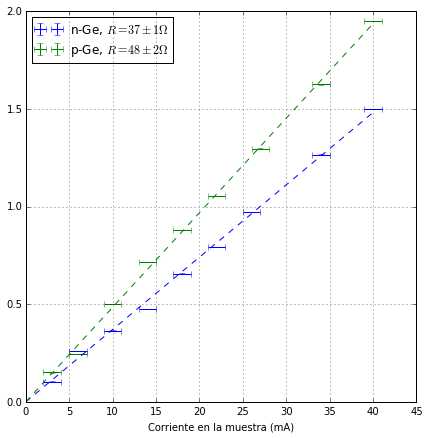

In [6]:
NI = [ 0, 3, 6, 10, 14, 18, 22, 26, 34, 40 ]
NV = [ -0.270, 0.103, 0.259, 0.365, 0.474, 0.656, 0.794, 0.971, 1.266, 1.498 ]
PI = [ 0, 3, 6, 10, 14, 18, 22, 27, 34, 40 ]
PV = [ -0.420, 0.151, 0.245, 0.501, 0.717, 0.879, 1.055, 1.296, 1.625, 1.951 ]

NR, errNR = fit( lin0, NI, NV, sigma = 0.001 )
PR, errPR = fit( lin0, PI, PV, sigma = 0.001 )
NR, PR = NR[0], PR[0]
errNR, errPR = sqrt( diag( errNR )[0] ), sqrt( diag( errPR )[0] )

NR0, errNR, PR0, errPR = NR/0.001, errNR/0.001, PR/0.001, errPR/0.001

print( NR0, errNR )
print( PR0, errPR )

x = linspace( 0, 40, 1000 )
figure( )
errorbar( NI, NV, xerr = 1, yerr = 0.001, fmt = 'none', label = r'n-Ge, $R = 37 \pm 1 \Omega$' )
errorbar( PI, PV, xerr = 1, yerr = 0.001, fmt = 'none', label = r'p-Ge, $R = 48 \pm 2 \Omega$' )
plot( x, lin0( x, NR0*0.001 ), '--b' )
plot( x, lin0( x, PR0*0.001 ), '--g' )
xlim( 0, 45 )
ylim( 0, 2 )
legend( loc = 2 )
grid( )
xlabel( r'Corriente en la muestra (mA) ' )
ylabel( r'Caída de voltaje (V)' )
savefig( 'RSinCampo.pdf' )
show( )

## 4.) Resistencia relativa en funcion del campo magnetico

-0.0399732082042 2.35576504164e-05 8.68822850908e-08
-0.0369460165376 3.15011124541e-05 1.70840453276e-07


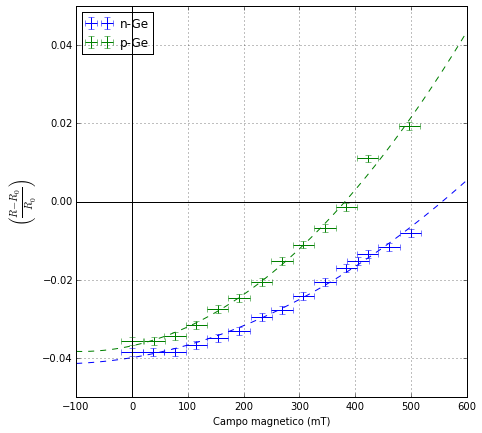

In [9]:
NI = [ 0, 0.2, 0.4, 0.6, 0.8, 1, 1.21, 1.4, 1.6, 1.8, 2, 2.11, 2.2, 2.4, 2.6 ]
NV = [ 0.534, 0.534, 0.534, 0.535, 0.536, 0.537, 0.539, 0.540, 0.542, 0.544, 0.546, 0.547, 0.548, 0.549, 0.551 ] 
PI = [ 0, 0.21, 0.4, 0.6, 0.8, 1.0, 1.21, 1.4, 1.6, 1.8, 2.0, 2.2, 2.59 ]
PV = [ 0.7, 0.7, 0.701, 0.703, 0.706, 0.708, 0.711, 0.715, 0.718, 0.721, 0.725, 0.734, 0.740 ]

NR = [ ((i/0.015)-NR0)/NR0 for i in NV ]
PR = [ ((i/0.015)-PR0)/PR0 for i in PV ]
NI = [ B2*i for i in NI ]
PI = [ B2*i for i in PI ]

nRM = poly1d( polyfit( NI, NR, 2 ) )
pRM = poly1d( polyfit( PI, PR, 2 ) )

print nRM[0], nRM[1], nRM[2]
print pRM[0], pRM[1], pRM[2]

x = linspace( -100, 600, 1000 )
figure( )
axhline( 0, linewidth = 1, color = 'k' )
axvline( 0, linewidth = 1, color = 'k' )
errorbar( NI, NR, xerr = B2*0.1, yerr = 0.001, fmt = 'none', label = r'n-Ge' )
errorbar( PI, PR, xerr = B2*0.1, yerr = 0.001, fmt = 'none', label = r'p-Ge' )
plot( x, nRM( x ), '--b' )
plot( x, pRM( x ), '--g' )
legend( loc = 2 )
grid( )
xlabel( 'Campo magnetico (mT)' )
ylabel( r'$\left( \frac{R-R_0}{R_0} \right)$', fontsize = 15 )
savefig( 'RMag.pdf' )
show( )

## 5.) Voltaje en funcion de la temperatura a 0T

In [10]:
NVLong = [ ]
NTLong = [ ]

import csv
with open('NLong.csv', 'r') as csvfile:
    data = csv.reader( csvfile, delimiter=',' )
    for row in data:
        NVLong.append( float( row[0] ) )
        NTLong.append( float( row[1] ) )


NRLong = [ ((i/0.03)**-1)/0.02 for i in NVLong ]
NTLongInv = [ 1/(i + 273.15) for i in NTLong ]
n = NTLongInv.index( max( NTLongInv ) )
NTLong.pop( n )
NTLongInv.pop( n )
NRLong.pop( n )

inicioInt =  NRLong.index(min( NRLong )) + 20
def intrinseca( x, A, B ):
    return A*(e**(-B*x))
Int, errInt = fit( intrinseca, NTLongInv[inicioInt:], NRLong[inicioInt:], sigma = 0.05 )
errInt = sqrt( diag( errInt ) )
print( Int, errInt )

x = linspace( 0, 0.004, 1000 )
figure( )
errorbar( NTLongInv, NRLong, xerr =1e-5, yerr = 0.05, fmt = 'none', label = 'n-Ge' )
plot( x, intrinseca( x, Int[0], Int[1] ), '--', label = r'Ajuste a la curva $f(x) =$'+ str(Int[0]) * r'$\exp(-$'+str(Int[1]) +r'x)$' )
xlim( 0.0024, 0.0034 )
ylim( 1, 3.5 )
grid( )
legend( )
xlabel( r'Inverso de la temperatura  $\left(K^{-1}\right)$', fontsize = 15 )
ylabel( r'Conductividad por metro  $\left(\frac{S}{m}\right)$', fontsize = 15 )
savefig( 'ConductividadTemp.pdf' )
show( )

IOError: [Errno 2] No such file or directory: 'NLong.csv'

## Voltaje de Hall en funcion de la temperatura para un campo de 1.6A

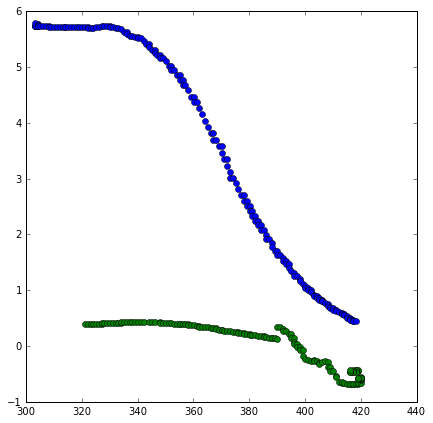

In [136]:
NVHall = [ ]
NTemp = [ ]
PVHall = [ ]
PTemp = [ ]
import csv
with open('NHall.csv', 'r') as csvfile:
    data = csv.reader( csvfile, delimiter=',' )
    for row in data:
        NVHall.append( float( row[0] ) )
        NTemp.append( float( row[1] ) )
with open('PHall.csv', 'r') as csvfile:
    data = csv.reader( csvfile, delimiter=',' )
    for row in data:
        PVHall.append( float( row[0] ) )
        PTemp.append( float( row[1] ) )

NR = [ (i)/(0.03*1.6*B2) for i in NVHall ]
PR = [ -(i)/(0.03*1.6*B2) for i in PVHall ]
NTemp, PTemp = [ i+273.15 for i in NTemp ], [ i+273.15 for i in PTemp ]

del PTemp [:20]
del PR [:20]

figure( )
plot( NTemp, NR, 'o' )
plot( PTemp, PR, 'o' )
show( )